# IMPORTS

In [370]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import kurtosis

import glob
import os

# PROBLEM STATEMENT (DRIVER SAFETY)

- Problem Overview

- Main Objective

# DATA LOADING

In [371]:
import pandas as pd
try:
    excel_url = "https://adbdatathon.s3.af-south-1.amazonaws.com/Datathon/Vehicle_Data.xlsx"
    
    print(f"Attempting to read Excel file from URL: {excel_url}\n")
    
    # No special options needed for a direct public HTTPS link
    df_excel = pd.read_excel(excel_url)
    
    print("✅ Successfully read Excel file from URL!")
    print("First 5 rows of the Excel data:")
    print(df_excel.head())

except Exception as e:
    print(f"❌ Error reading Excel file: {e}")
try:
    excel_url = "https://adbdatathon.s3.af-south-1.amazonaws.com/Datathon/part-00590-tid-6661262080813627668-5b71b33c-8263-4f63-9ea0-b9e2e435cab4-130881-1.c000.snappy.parquet"
    
    print(f"Attempting to read Excel file from URL: {excel_url}\n")
    
    # No special options needed for a direct public HTTPS link
    df_parquet = pd.read_parquet(excel_url)
    
    print("✅ Successfully read Excel file from URL!")
    print("First 5 rows of the Excel data:")
    print(df_parquet.head())

except Exception as e:
    print(f"❌ Error reading parquet file: {e}")


Attempting to read Excel file from URL: https://adbdatathon.s3.af-south-1.amazonaws.com/Datathon/Vehicle_Data.xlsx

✅ Successfully read Excel file from URL!
First 5 rows of the Excel data:
              IMEI        Make             Model           Colour    Year  \
0  860305051123794  VOLKSWAGEN     VW 27X - POLO      WHITE / WIT  2018.0   
1  860305051124123     HYUNDAI              ATOS  SILVER / SILWER  2022.0   
2  860305051147801        FORD            RANGER      GREY / GRYS  2022.0   
3  860305051168823      SUZUKI            ERTIGA      WHITE / WIT  2023.0   
4  860305051198176  VOLKSWAGEN  VW 240-POLO VIVO  SILVER / SILWER  2011.0   

    Age  Gender  
0  38.0    Male  
1  46.0    Male  
2  45.0    Male  
3  64.0    Male  
4  40.0  Female  
Attempting to read Excel file from URL: https://adbdatathon.s3.af-south-1.amazonaws.com/Datathon/part-00590-tid-6661262080813627668-5b71b33c-8263-4f63-9ea0-b9e2e435cab4-130881-1.c000.snappy.parquet

✅ Successfully read Excel file from URL!


In [372]:
owner = df_excel.copy()
owner.head()

,IMEI,Make,Model,Colour,Year,Age,Gender
0,860305051123794,VOLKSWAGEN,VW 27X - POLO,WHITE / WIT,2018.0,38.0,Male
1,860305051124123,HYUNDAI,ATOS,SILVER / SILWER,2022.0,46.0,Male
2,860305051147801,FORD,RANGER,GREY / GRYS,2022.0,45.0,Male
3,860305051168823,SUZUKI,ERTIGA,WHITE / WIT,2023.0,64.0,Male
4,860305051198176,VOLKSWAGEN,VW 240-POLO VIVO,SILVER / SILWER,2011.0,40.0,Female


The above data shows details of different models of cars owned by individuals. 

In [373]:
pd.set_option('display.max_columns',500)
tracking = df_parquet.copy()
tracking.head()

,sourceimei,battery_voltage_value,hardware_attached_gps_not_present,unitdatetime,eventid,latitude,longitude,altitude,speed,heading,bearing,odometer,gforce_forward,gforce_backward,gforce_up,gforce_down,gforce_left,gforce_right,engine_hours,classification,closest_suburb,condition,country,distance_suburb,municipality,postal_code,province,road,road_distance_m,rough_road,roadspeed,suburb,town
0,869716067485269,12.484994,1,2025-10-08 11:24:34 PM,5E,-26.122560,28.078880,1639.0,0,80,80,261911,0,50,0,950,0,0,159382,70,None,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
1,869716067485269,12.845138,1,2025-10-08 03:59:49 PM,02,-26.122560,28.078880,1639.0,0,80,80,261911,0,50,0,950,0,0,159381,70,None,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
2,869716067485269,12.845138,1,2025-10-08 03:59:50 PM,02,-26.122560,28.078880,1639.0,0,80,80,261911,0,50,0,950,0,0,159381,70,None,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
3,869716067485269,12.845138,1,2025-10-08 03:59:51 PM,02,-26.122564,28.078883,1639.0,0,80,80,261911,0,50,0,950,0,0,159382,70,None,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
4,869716067485269,12.845138,1,2025-10-08 03:59:51 PM,00,-26.122560,28.078880,1639.0,0,80,80,261911,0,50,0,950,0,0,159382,70,None,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg


The above data shows vehicle tracking based on location, speed, vehicle components

In [374]:
df_excel.shape

(949, 7)

This dataset contains information on car makes and models and has 949 entries with 7 attributes. 

In [375]:
df_parquet.shape

(58426, 33)

This dataset containing car telemetrics has 58 426 entries and 33 attributes. 

# DATA PREPROCESSING AND CLEANING

### OWNER DATA

In [376]:
owner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IMEI    949 non-null    int64  
 1   Make    948 non-null    object 
 2   Model   948 non-null    object 
 3   Colour  948 non-null    object 
 4   Year    948 non-null    float64
 5   Age     921 non-null    float64
 6   Gender  921 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 52.0+ KB


The above shows a mixture of categorical and numerical data entries. Additionally, not all entries are non-null, which implies the presence of missing/null values.

In [377]:
# Remove colour feature
owner = owner.drop(columns='Colour')
print("Successfully dropped!")

Successfully dropped!


Removed colour feature as it is irrelevant to road driver/driving safety

In [378]:
owner.describe()

,IMEI,Year,Age
count,9.490000e+02,948.000000,921.000000
mean,8.649012e+14,2018.279536,47.857763
std,4.276071e+12,4.627511,10.896567
min,8.603051e+14,2003.000000,26.000000
25%,8.603051e+14,2015.000000,39.000000
50%,8.647141e+14,2019.000000,47.000000
75%,8.697161e+14,2022.000000,56.000000
max,8.697161e+14,2024.000000,74.000000


- The IMEI is only a unique identifier for individuals and has no statistical relevance.
- From the data, car models range from oldest (2003) to newest (2024).
- The minimum age is 26 which is above the legal driving age in South Africa.

##### MISSING/NULL VALUES

In [379]:
# The implicance of missing/null values is there, How many though?
# How do we handle them?

owner.isnull().sum()

IMEI       0
Make       1
Model      1
Year       1
Age       28
Gender    28
dtype: int64

- The number of missing/null values across the features are less than 3% of the dataset.
- We want to analyze the randomness of the missing data (exploring the relation between age and gender)

In [ ]:
# Is it gender absent and age present, age absent and gender present or both absent?

null_owner_gender_age = owner[owner[['Age', 'Gender']].isnull().all(axis=1)]

null_owner_gender_age.head(6)


,IMEI,Make,Model,Year,Age,Gender
59,864714060587087,TOYOTA,HILUX,2023.0,NaN,NaN
74,868440060701058,VOLKSWAGEN,POLO,2021.0,NaN,NaN
183,864714060571628,VOLKSWAGEN,VN 750-KOMBI,2011.0,NaN,NaN
186,864714060588960,SUZUKI,VITARA BREZZA,2023.0,NaN,NaN
187,864714060615706,NaN,NaN,NaN,NaN,NaN
215,869716064220305,MAZDA,MAZDA CX-30,2023.0,NaN,NaN


- All the missing/null  values for both features are simultaneously null. This may imply that the missing/null values are not missing at random as individuals might not have been comfortable with disclosing their personal information such as age and gender. 
- As the unique entries of age and gender cannot be assumed, we have decided to drop the missing/null values.

In [ ]:
owner = owner.dropna()

owner.isnull().sum()


IMEI      0
Make      0
Model     0
Year      0
Age       0
Gender    0
dtype: int64

Removed/Dropped missing value entries.

In [ ]:
# Duplicates
print(owner.duplicated().sum())

0


There are no duplicates

##### OUTLIERS

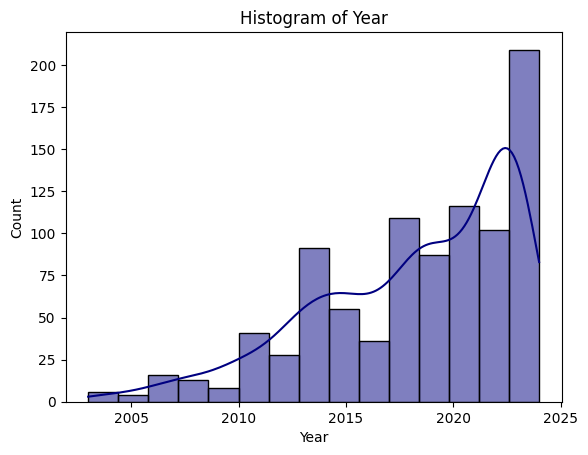

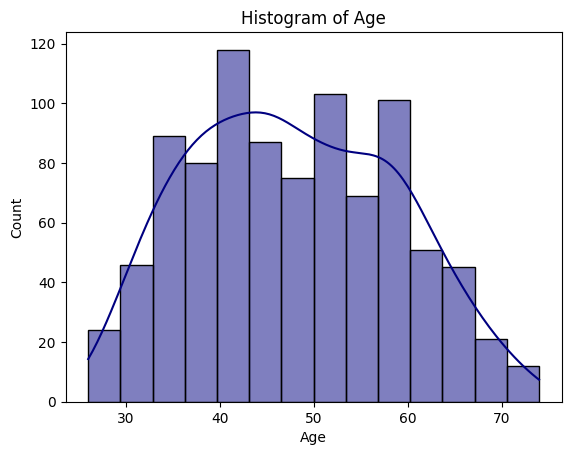

In [ ]:
# visualize data distributions

num_cols = ['Year', 'Age']

for col in num_cols:
    plt.figure()
    sns.histplot(owner[col].dropna(), kde=True, color='#000080')
    plt.title(f"Histogram of {col}")
    plt.show()

The Year feature has a slight light tail which may imply a small likelyhood of outliers.

In [ ]:
# Kurtosis for heavy/light tails to check for extreme value distributios

# compute the kurtosis for numerical columns
kurtosis_values = owner.select_dtypes(include=['float64', 'int64']).apply(kurtosis)
print("Kurtosis values: \n", kurtosis_values)

# Highlight features with potental outliers
suspicious_cols = kurtosis_values[kurtosis_values > 3]
print("\n Columns with heavy tails (possible outliers): \n", suspicious_cols)

Kurtosis values: 
 IMEI   -1.844379
Year    0.021509
Age    -0.825079
dtype: float64

 Columns with heavy tails (possible outliers): 
 Series([], dtype: float64)


Based on the kurtosis analysis, no numerical features are less likely to have outliers. Although further investigaton to be done. 

In [ ]:
num_cols = ['Year', 'Age']

for col in num_cols:
    Q1 = owner[col].quantile(0.25)
    Q3 = owner[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = owner[(owner[col] < lower_bound) | (owner[col] > upper_bound)]
    #     print(f"Outliers in {col}: \n", outliers)
    print(f"Outliers in {col}: {len(outliers)} records")

Outliers in Year: 6 records
Outliers in Age: 0 records


Based on the boxplots bove, the Year feature has 6 outliers which is reasonable given that individuals can own old car models. Thus, we have to decided to keep them.

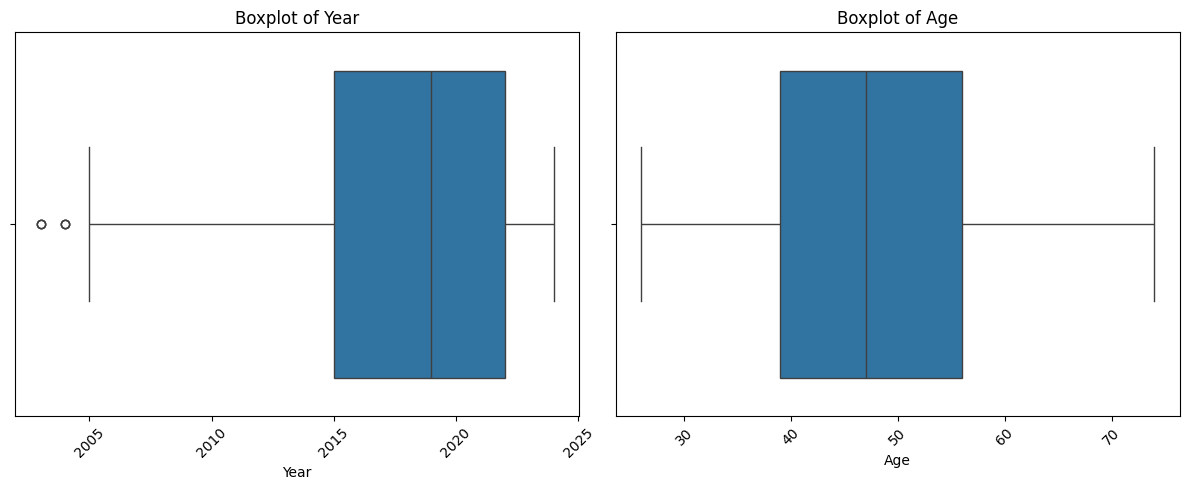

In [ ]:
# How many outliers could there be though (if any)?

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(
    data=owner,
    x='Year',
)
plt.title('Boxplot of Year')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(
    data=owner,
    x='Age',
)
plt.title('Boxplot of Age')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Based on the boxplots above, the Year feature has overlapping outliers.

In [ ]:
# Identify unique categorical entries 
cat_cols = owner.select_dtypes(include=['object'])

for col in cat_cols:
    print(f"Unique categories in {col}: ", owner[col].unique()) 
    # Standardize capitalization and spacing 
    owner[col] = owner[col].str.strip().str.title() 

Unique categories in Make:  ['VOLKSWAGEN' 'HYUNDAI' 'FORD' 'SUZUKI' 'BMW' 'AUDI' 'TATA' 'CHEVROLET'
 'NISSAN' 'KIA' 'JEEP' 'TOYOTA' 'OPEL' 'CHERY' 'CITROEN' 'HONDA'
 'AUTO BRILLIANCE' 'DATSUN' 'BAIC' 'RENAULT' 'MERCEDES-BENZ' 'HAVAL'
 'MAHINDRA' 'MAZDA' 'GREAT WALL MOTORS' 'ISUZU' 'SMART' 'MINI' 'CHRYSLER'
 'FIAT' 'NISSAN DIESEL' 'PEUGEOT' 'LAND ROVER' 'MITSUBISHI' 'SUBARU'
 'VOKSWAGEN' 'MERCEDES- BENZ' 'TOYOTA CORROLA' 'GEELY' 'VOLVO'
 'VW COMMERCIAL' 'LEXUS' 'GWM' 'TOYOT']
Unique categories in Model:  ['VW 27X - POLO' 'ATOS' 'RANGER' 'ERTIGA' 'VW 240-POLO VIVO' 'X3'
 'A4 1.8T AMBITION (B8)' 'INDIGO 1.4 MANZA IGNIS' 'FOCUS' 'SPARK' 'NP 200'
 'SONET' 'GRAND CHEROKEE' 'AU 481-A4' 'AVANZA 1.5 SX'
 'RANGER 2.2 TDCi XL PLUS 4X4 P/U D/C' 'S-PRESSO 1.0 GL+ 5AMT' 'CORSA'
 'POLO VIVO' 'KA' 'RAV4 2.0 GX' 'COROLLA QUEST 1.6' 'VW 241-POLO VIVO'
 'S-PRESSO' 'TIGGO 4 PRO 1.5  URBAN' 'C3' 'AGYA' 'VW 370 - GOLF' 'VIVO'
 'YARIS' 'TIGGO 4 PRO 1.5  URBAN   (2021 - 2022)' 'COROLLA' 'ACCENT'
 'DZIRE 1.2 G

Looking at the Make text values, we detected odd text value errors where individuals wrote the same thing in various ways.
This can be mitigated by re-mapping the erronous/odd text values correctly.

In [ ]:
# re-map odd text values in Make feature

# re-map odd text values in Make feature

make_mapping = {
    # Consolidate misspellings and abbreviations
    'Vokswagen': 'Volkswagen',
    'Mercedes- Benz': 'Mercedes-Benz',
    'Toyota Corrola': 'Toyota',  # Assuming this meant the make is Toyota
    'Toyot': 'Toyota',
    'Gwm': 'Great Wall Motors',
    'Vw Commercial': 'Volkswagen', # Assuming VW Commercial is a Volkswagen category
    'Auto Brilliance': 'Brilliance', # Simplified
}

# Mapping for the 'Model' column
# This is a sample; you will need to expand this based on your domain knowledge.
model_mapping = {
    # Consolidate Polo variants
    'Vw 27X - Polo': 'Polo',
    'Vw 240-Polo Vivo': 'Polo Vivo',
    'Vw 241-Polo Vivo': 'Polo Vivo',
    'Vw 25X - Polo Vivo': 'Polo Vivo',
    'Vw 250 - Polo': 'Polo',
    'Vw 240-Polo': 'Polo',
    'Vw 27X-Polo': 'Polo',
    'Vw24X-Polo': 'Polo',
    'Polo Gp 1.0 Tsi R-Line Dsg': 'Polo',
    'Polo Gp 1.2 Tsi Highline (81Kw)': 'Polo',
    'Polo Vivo 1.4 Trendline (5Dr)': 'Polo Vivo',

    # Consolidate Tiggo variants
    'Tiggo 4 Pro 1.5 Urban': 'Tiggo 4 Pro',
    'Tiggo 4 Pro 1.5 Comfort Cvt': 'Tiggo 4 Pro',
    'Tiggo 4 Pro 1.5 Urban (2021 - 2022)': 'Tiggo 4 Pro',

    # Consolidate Hilux variants
    'Hilux 2.4 Gd S A/C P/U S/C': 'Hilux',
    'Hilux 2.4 Gd6 4X4 Raider P/U D/C (2020 - 2022)': 'Hilux',
    'HiluxDc 2.8Gd6 4X4 Lgd At': 'Hilux',
    'Hilux D4D': 'Hilux',
    'Hillux': 'Hilux',

    # Simple misspellings / inconsistencies
    'Quashqai': 'Qashqai',
    'I20 Ib': 'I20',
    'I20 Facelift': 'I20',
    'Grand I10': 'Grand I10', # Ensures variants are handled consistently

    # Numeric entries (should be strings for consistency)
    '500': '500',
    '3008': '3008',
    '2': '2',
    '207': '207',
    '86': '86',
}

# 3. Apply the Mappings
owner['Make'] = owner['Make'].replace(make_mapping)
owner['Model'] = owner['Model'].replace(model_mapping)

# 4. Final Verification
print("--- After Applying Mappings ---")
print("Unique categories in Make (Cleaned):")
print(owner['Make'].unique())

print("\nUnique categories in Model (Cleaned, Top 20):")
print(owner['Model'].value_counts().head(20))

--- After Applying Mappings ---
Unique categories in Make (Cleaned):
['Volkswagen' 'Hyundai' 'Ford' 'Suzuki' 'Bmw' 'Audi' 'Tata' 'Chevrolet'
 'Nissan' 'Kia' 'Jeep' 'Toyota' 'Opel' 'Chery' 'Citroen' 'Honda'
 'Brilliance' 'Datsun' 'Baic' 'Renault' 'Mercedes-Benz' 'Haval' 'Mahindra'
 'Mazda' 'Great Wall Motors' 'Isuzu' 'Smart' 'Mini' 'Chrysler' 'Fiat'
 'Nissan Diesel' 'Peugeot' 'Land Rover' 'Mitsubishi' 'Subaru' 'Geely'
 'Volvo' 'Lexus']

Unique categories in Model (Cleaned, Top 20):
Model
Polo         41
Polo Vivo    41
Np 200       25
Hilux        24
Ertiga       22
Corolla      20
Swift        18
Ranger       18
Etios        15
S-Presso     14
I20          14
Kwid         11
Starlet      10
D-Max        10
Triber       10
Yaris         9
Sandero       9
Tucson        9
W 205         8
I10           8
Name: count, dtype: int64


Used Gemini to generate the re-mapping for the odd text values in the make and model features for consistency and clarity

In [ ]:
# Fixing naming conventions
# Age -> owner_age, Year -> model_year

specific_renames = {
    'Age': 'owner_age',
    'Year': 'model_year'
}

owner.rename(columns=specific_renames, inplace=True)

owner.columns = owner.columns.str.strip().str.lower().str.replace(' ', '_')

print(owner.columns.tolist())


['imei', 'make', 'model', 'model_year', 'owner_age', 'gender']


Fixed the naming conventions to be consistent in all lowercase and for context clarification

### TRACKING DATA

In [ ]:
tracking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58426 entries, 0 to 58425
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   sourceimei                         58426 non-null  object 
 1   battery_voltage_value              58426 non-null  float64
 2   hardware_attached_gps_not_present  58426 non-null  int32  
 3   unitdatetime                       58426 non-null  object 
 4   eventid                            58426 non-null  object 
 5   latitude                           58426 non-null  float64
 6   longitude                          58426 non-null  float64
 7   altitude                           58426 non-null  float64
 8   speed                              58426 non-null  int32  
 9   heading                            58426 non-null  int32  
 10  bearing                            58426 non-null  int32  
 11  odometer                           58426 non-null  int

The dataset has a mixture of categorical and numerical features. Most features have non-null entries implying the likelihood absence of missing/null values. There are slight structural errors and inconsistencies that need to be re-defined.

In [ ]:
tracking.describe()

,battery_voltage_value,hardware_attached_gps_not_present,latitude,longitude,altitude,speed,heading,bearing,odometer,gforce_forward,gforce_backward,gforce_up,gforce_down,gforce_left,gforce_right,classification,condition,distance_suburb,road_distance_m,rough_road,roadspeed
count,58426.000000,58426.0,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.0,58426.000000,58426.000000,58426.000000,58426.000000,58426.0,58426.0,58426.0,58426.0,58426.00000
mean,13.704979,1.0,-26.099839,27.942585,1657.091466,29.428166,177.321124,177.321124,261671.663728,9.239037,53.542943,0.0,955.319550,35.780303,4.751309,53.221528,1.0,0.0,0.0,0.0,59.96012
std,0.369365,0.0,0.027026,0.136306,84.991365,33.573539,110.858807,110.858807,162.344206,30.907752,54.371834,0.0,117.008913,43.848121,23.432835,16.328609,0.0,0.0,0.0,0.0,32.56671
min,10.564226,1.0,-26.157793,27.747722,1447.000000,0.000000,0.000000,0.000000,261420.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,10.000000,1.0,0.0,0.0,0.0,0.00000
25%,13.685474,1.0,-26.121980,27.782270,1605.000000,0.000000,80.000000,80.000000,261515.000000,0.000000,0.000000,0.0,950.000000,0.000000,0.000000,51.000000,1.0,0.0,0.0,0.0,60.00000
50%,13.925570,1.0,-26.103800,27.965100,1639.000000,20.000000,182.000000,182.000000,261683.000000,0.000000,50.000000,0.0,950.000000,50.000000,0.000000,60.000000,1.0,0.0,0.0,0.0,60.00000
75%,13.925570,1.0,-26.077950,28.078819,1735.000000,51.000000,272.000000,272.000000,261809.000000,0.000000,100.000000,0.0,1000.000000,50.000000,0.000000,60.000000,1.0,0.0,0.0,0.0,80.00000
max,14.165666,1.0,-26.033770,28.098120,1822.000000,121.000000,360.000000,360.000000,261911.000000,600.000000,300.000000,0.0,1600.000000,450.000000,350.000000,80.000000,1.0,0.0,0.0,0.0,120.00000


- STATISTICALLY IRRELEVANT FEATURES

- Mention decision of reverting back to categorical indicators (for analysis)

In [ ]:
# Revert some statistically irrelevant features that are identifiers or indicator



In [ ]:
stat_tracking = tracking[['battery_voltage_value', 'speed', 'odometer', 'gforce_forward', 'gforce_backward', 'gforce_up',	'gforce_down',	'gforce_left',	'gforce_right', 'roadspeed' ]]

stat_tracking.describe()

,battery_voltage_value,speed,odometer,gforce_forward,gforce_backward,gforce_up,gforce_down,gforce_left,gforce_right,roadspeed
count,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.0,58426.000000,58426.000000,58426.000000,58426.00000
mean,13.704979,29.428166,261671.663728,9.239037,53.542943,0.0,955.319550,35.780303,4.751309,59.96012
std,0.369365,33.573539,162.344206,30.907752,54.371834,0.0,117.008913,43.848121,23.432835,32.56671
min,10.564226,0.000000,261420.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
25%,13.685474,0.000000,261515.000000,0.000000,0.000000,0.0,950.000000,0.000000,0.000000,60.00000
50%,13.925570,20.000000,261683.000000,0.000000,50.000000,0.0,950.000000,50.000000,0.000000,60.00000
75%,13.925570,51.000000,261809.000000,0.000000,100.000000,0.0,1000.000000,50.000000,0.000000,80.00000
max,14.165666,121.000000,261911.000000,600.000000,300.000000,0.0,1600.000000,450.000000,350.000000,120.00000


- Over 25% of individuals are driving cars that have [good/healthy battery conditions](https://www.centurybatteries.com.au/battery-hub/expert-advice/maximising-battery-life#:~:text=To%20check%20the%20voltage%20you,No%20further%20action%20is%20required)  (above 12.6 V).
- The minimum speed is 0 kph (car is parked/stationary) whilst the maximum is 121 kph (normal highway speed). The highest speed limit (roadspeed) is 120 kph.
- The gravitational forces acting around the vehicle show the minimum forces being 0 milliG (for when the car is stationary) and maximum forces reaching 1600 milliG (driving). These can be insightful for the vehicle acceleration.


In [ ]:
# Count missing/null values
null_counts = tracking.isnull().sum()

# Filter the resulting Series to keep only counts > 0
columns_with_nulls = null_counts[null_counts > 0]

# 3. Print the result
print("Columns with Null Values:")
print(columns_with_nulls)


Columns with Null Values:
closest_suburb    58426
dtype: int64


The closest_suburb feature has no entry at all (100% null) and so we will drop/remove the entire feaure.

In [ ]:
# Remove closest surburb feature
tracking = tracking.drop('closest_suburb', axis=1)

Removed/Dropped the closest suburb feature

In [ ]:
print(tracking.duplicated().sum())

52


There are duplicates present in the data. 

In [ ]:
# Display duplicate rows to see differences

dups_rows = tracking[tracking.duplicated(keep=False)]

dups_rows.head(10)

,sourceimei,battery_voltage_value,hardware_attached_gps_not_present,unitdatetime,eventid,latitude,longitude,altitude,speed,heading,bearing,odometer,gforce_forward,gforce_backward,gforce_up,gforce_down,gforce_left,gforce_right,engine_hours,classification,condition,country,distance_suburb,municipality,postal_code,province,road,road_distance_m,rough_road,roadspeed,suburb,town
93,869716067485269,12.845138,1,2025-10-08 03:58:24 PM,02,-26.122550,28.078854,1634.0,0,80,80,261911,0,50,0,950,0,0,159380,70,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
94,869716067485269,12.845138,1,2025-10-08 03:58:24 PM,02,-26.122550,28.078854,1634.0,0,80,80,261911,0,50,0,950,0,0,159380,70,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
723,869716067485269,12.845138,1,2025-10-08 03:48:12 PM,02,-26.100956,28.081694,1623.0,0,348,348,261908,0,50,0,950,0,100,159370,60,1,South Africa,0,City of Johannesburg,2090,Gauteng,5th Street,0,0,60,Wynberg,Sandton
724,869716067485269,12.845138,1,2025-10-08 03:48:12 PM,02,-26.100956,28.081694,1623.0,0,348,348,261908,0,50,0,950,0,100,159370,60,1,South Africa,0,City of Johannesburg,2090,Gauteng,5th Street,0,0,60,Wynberg,Sandton
2787,869716067485269,12.965186,1,2025-10-07 03:23:23 PM,02,-26.122600,28.078810,1647.0,0,84,84,261898,0,50,0,950,0,0,159337,70,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
2788,869716067485269,12.965186,1,2025-10-07 03:23:23 PM,02,-26.122600,28.078810,1647.0,0,84,84,261898,0,50,0,950,0,0,159337,70,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
2850,869716067485269,13.205282,1,2025-10-07 03:22:25 PM,02,-26.122400,28.078720,1649.0,0,84,84,261898,0,50,0,950,0,0,159336,70,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
2851,869716067485269,13.205282,1,2025-10-07 03:22:25 PM,02,-26.122400,28.078720,1649.0,0,84,84,261898,0,50,0,950,0,0,159336,70,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
5222,869716067485269,12.845138,1,2025-10-06 03:46:00 PM,02,-26.122648,28.078830,1641.0,0,358,358,261885,0,50,0,950,0,0,159298,70,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
5223,869716067485269,12.845138,1,2025-10-06 03:46:00 PM,02,-26.122648,28.078830,1641.0,0,358,358,261885,0,50,0,950,0,0,159298,70,1,South Africa,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg


The duplicates are due to sensor/IoT data (same reading & timestamp) where the same individuals is tracked at diffferent times and locations. Thus, we will keep them for further analysis.

##### OUTLIERS

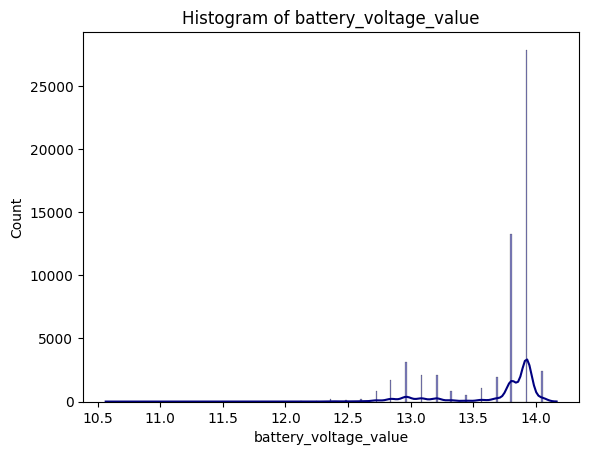

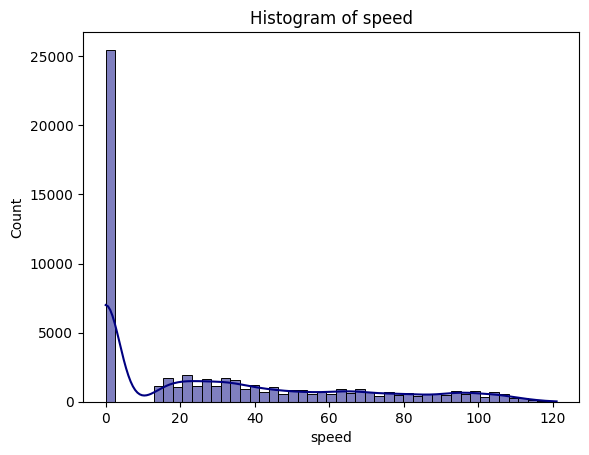

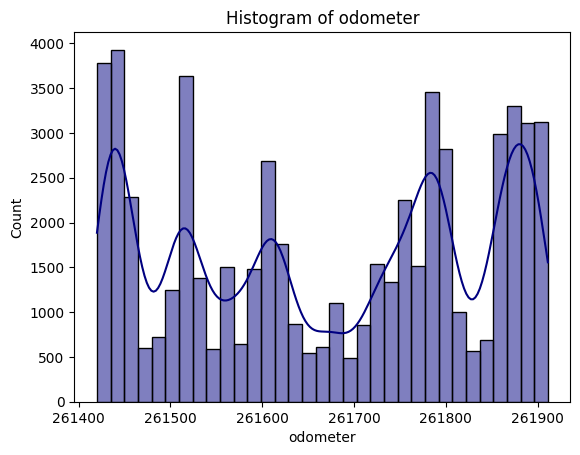

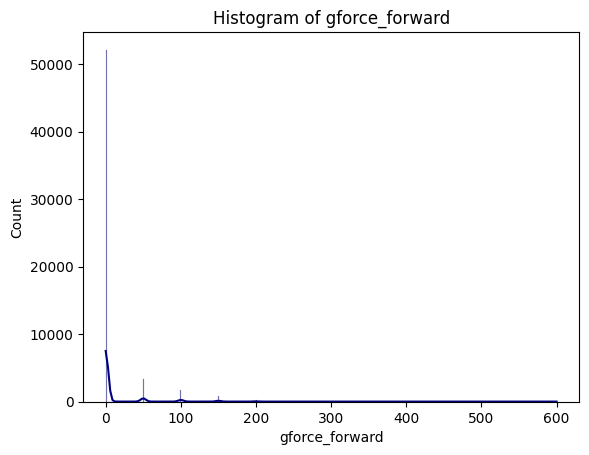

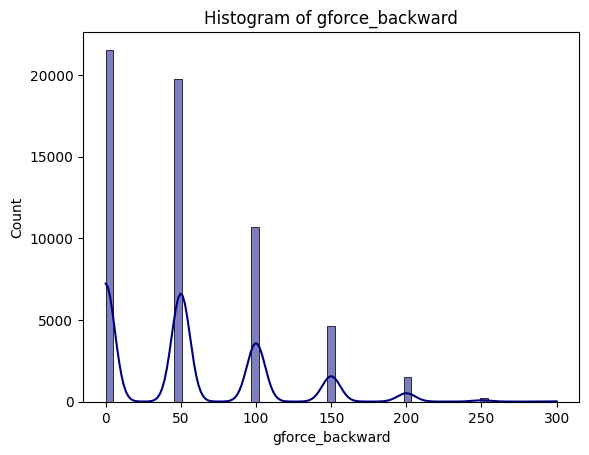

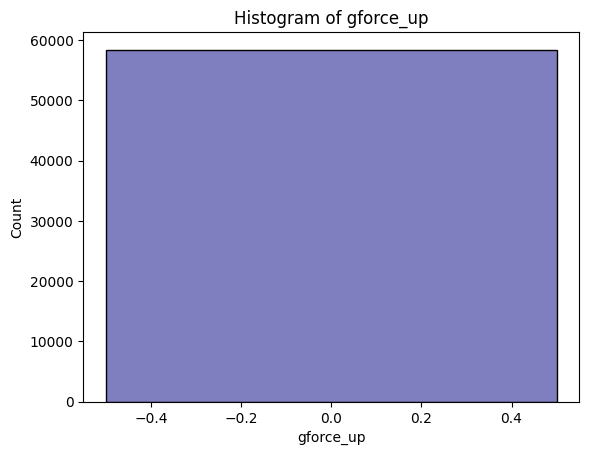

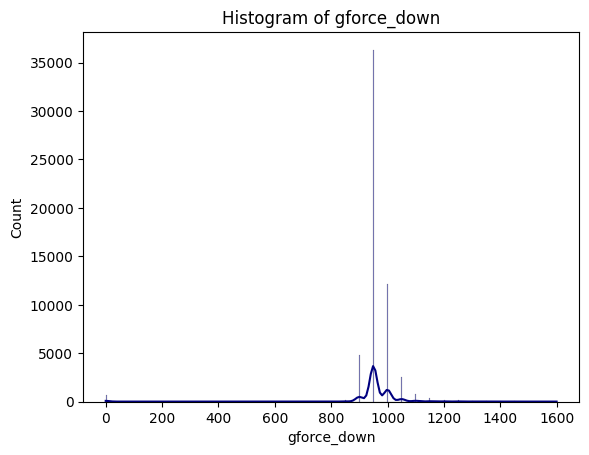

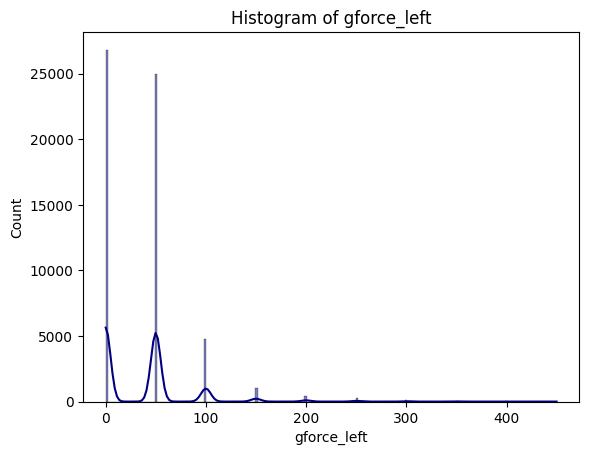

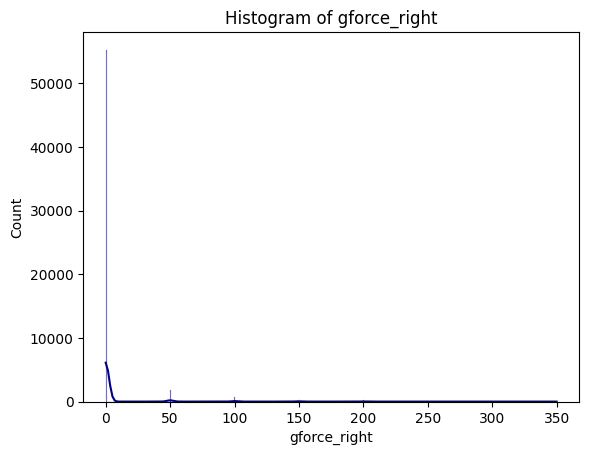

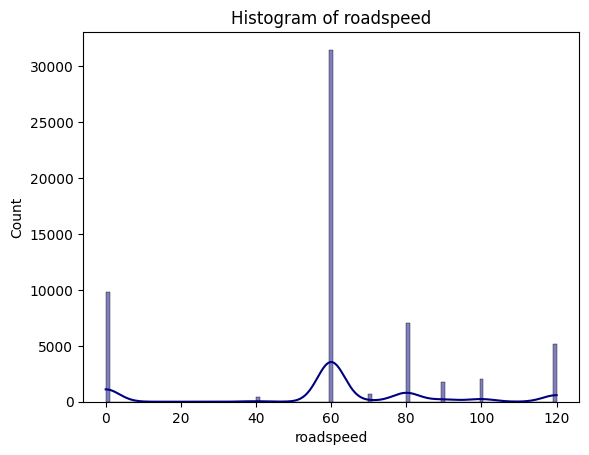

In [ ]:
# visualize data distributions

num_cols = ['battery_voltage_value', 'speed', 'odometer', 'gforce_forward', 'gforce_backward', 'gforce_up',	'gforce_down',	'gforce_left',	'gforce_right', 'roadspeed' ]

for col in num_cols:
    plt.figure()
    sns.histplot(tracking[col].dropna(), kde=True, color='#000080')
    plt.title(f"Histogram of {col}")
    plt.show()

- The voltage values have a heavy left tail, implying the likelihood of present outliers.

In [ ]:
# Kurtosis for heavy/light tails to check for extreme value distributios

# compute the kurtosis for numerical columns
kurtosis_values = tracking.select_dtypes(include=['float64', 'int64']).apply(kurtosis)
print("Kurtosis values: \n", kurtosis_values)

# Highlight features with potental outliers
suspicious_cols = kurtosis_values[kurtosis_values > 3]
print("\n Columns with heavy tails (possible outliers): \n", suspicious_cols)

Kurtosis values: 
 battery_voltage_value    1.789406
latitude                -0.403977
longitude               -1.674467
altitude                -0.668711
dtype: float64

 Columns with heavy tails (possible outliers): 
 Series([], dtype: float64)


Based on the kurtosis analysis, no numerical features are less likely to have outliers. Although further investigaton to be done. 

In [ ]:
num_cols = ['battery_voltage_value', 'speed', 'odometer', 'gforce_forward', 'gforce_backward', 'gforce_up',	'gforce_down',	'gforce_left',	'gforce_right', 'roadspeed' ]

for col in num_cols:
    Q1 = tracking[col].quantile(0.25)
    Q3 = tracking[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = tracking[(tracking[col] < lower_bound) | (tracking[col] > upper_bound)]
    #     print(f"Outliers in {col}: \n", outliers)
    print(f"Outliers in {col}: {len(outliers)} records")

Outliers in battery_voltage_value: 10434 records
Outliers in speed: 0 records
Outliers in odometer: 0 records
Outliers in gforce_forward: 6274 records
Outliers in gforce_backward: 44 records
Outliers in gforce_up: 0 records
Outliers in gforce_down: 2634 records
Outliers in gforce_left: 1928 records
Outliers in gforce_right: 3138 records
Outliers in roadspeed: 15016 records


Based on the boxplots bove, the Year feature has 2 outliers which is reasonable given that individuals can own old car models. Thus, we have to decided to keep them.

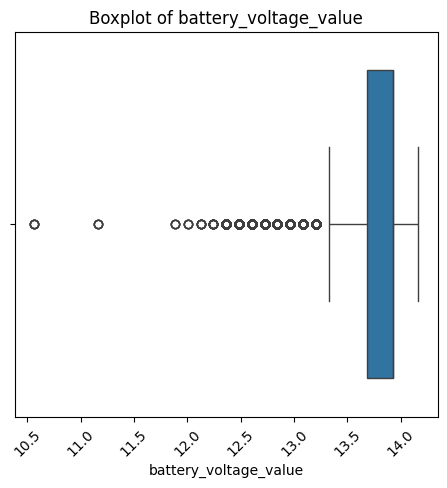

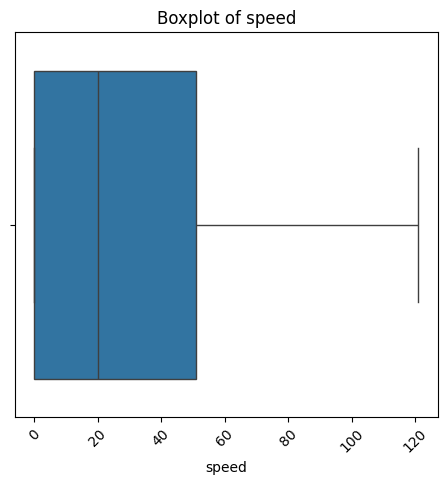

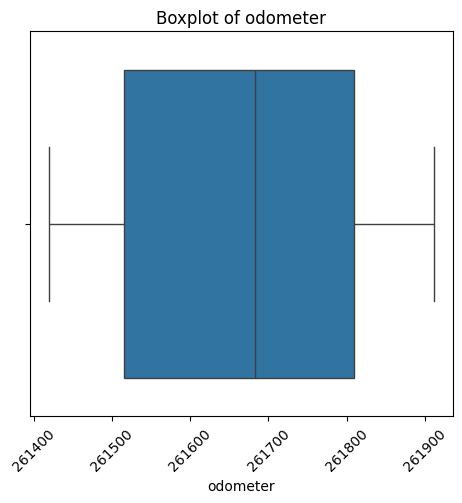

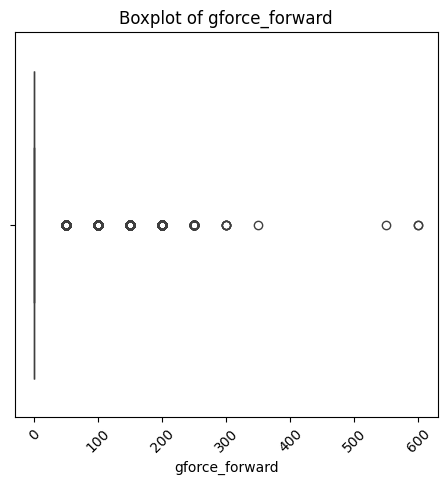

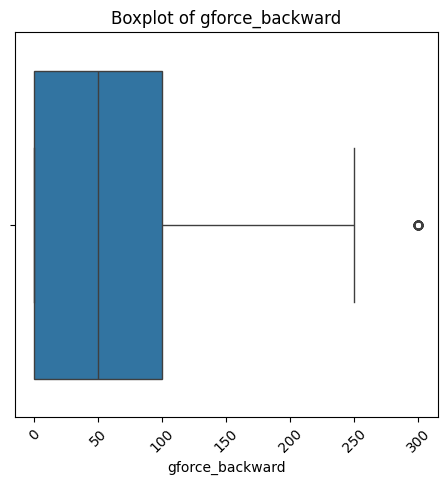

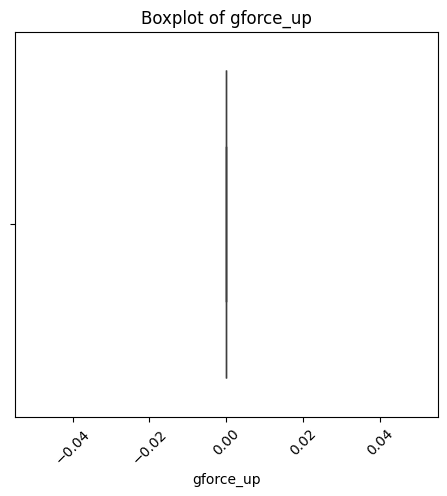

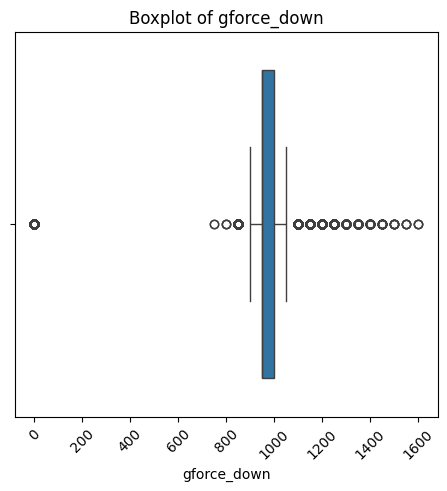

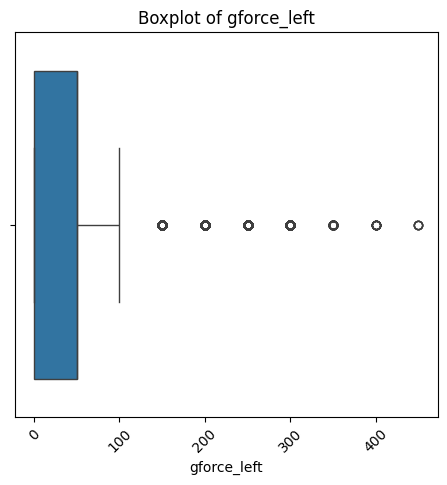

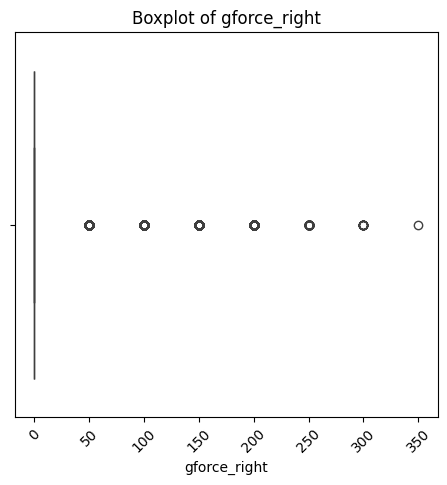

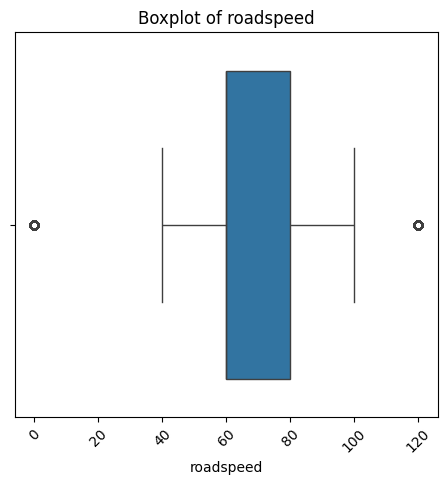

In [ ]:
# visualize outliers (if any)?

for col in num_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(
        data=tracking,
        x=col,
    )
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)


- The number of outliers indicated are extreme and based on the boxplots, those outliers overlap (have the same values)
- why do some not have q1, q2, median and so on?
- What do we do with them?

# EXPLORATORY DATA ANALYSIS

## OWNER DATA

## TRACKING DATA